# Netflix Analysis

## Importing libraries

In [11]:
import numpy as np
import pandas as pd

#for visualizations
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as pplt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

## Read Dataset

In [12]:
data = pd.read_csv('netflix_titles.csv')

In [8]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Data Preprocessing

In [15]:
data.count()

show_id         7787
type            7787
title           7787
director        5398
cast            7069
country         7280
date_added      7777
release_year    7787
rating          7780
duration        7787
listed_in       7787
description     7787
dtype: int64

In [13]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [9]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [84]:
shows = data[data['type']=='TV Show']
movies = data[data['type']=='Movie']

## Visualizations

### 1. Countplot of movies and shows

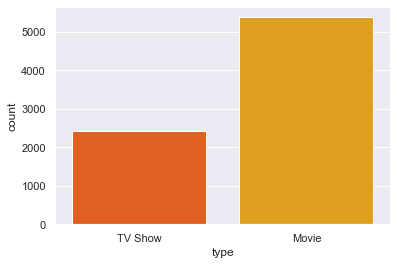

In [32]:
sns.set(style='darkgrid')
g = sns.countplot(x="type", data=data, palette="autumn")

The number of movies is greater than the number of shows in the dataset.

### 2. Movie ratings

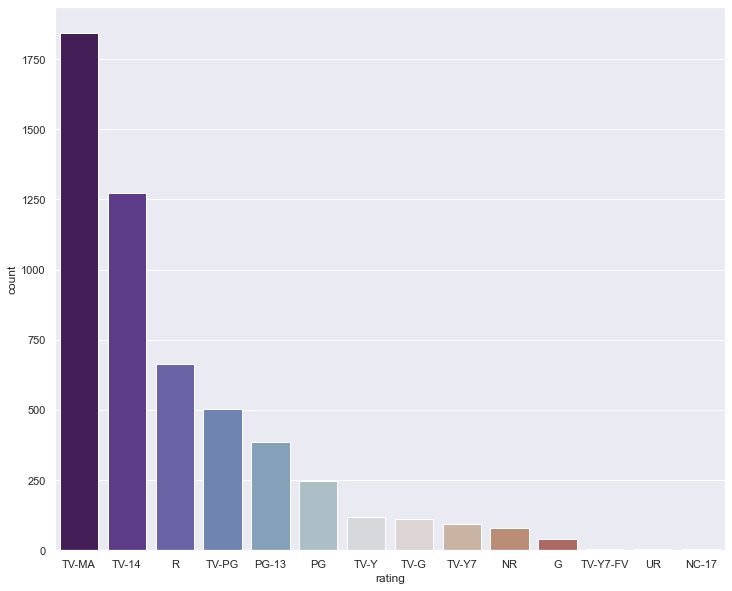

In [61]:
pplt.figure(figsize=(12, 10))
sns.set(style="darkgrid")

g=sns.countplot(x="rating", data=movies, palette="twilight_shifted", order=movies['rating'].value_counts().index[0:15])

### 3. TV Shows ratings

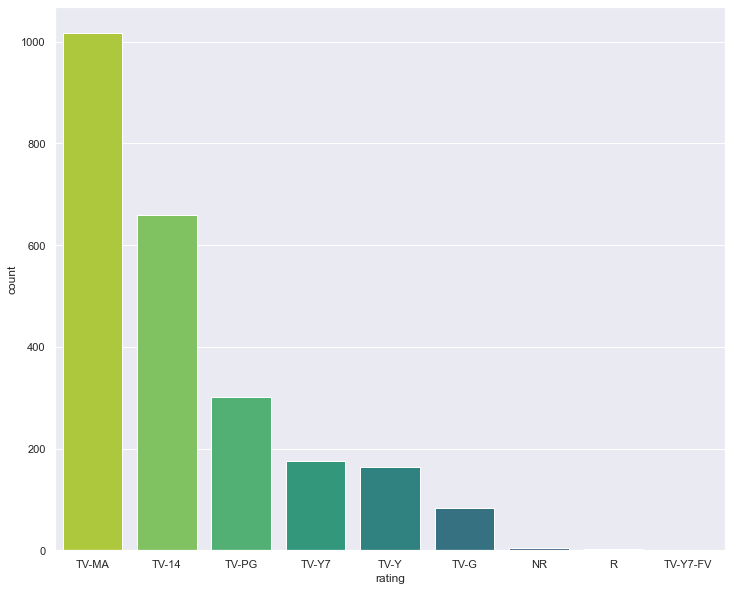

In [66]:
pplt.figure(figsize=(12, 10))
sns.set(style="darkgrid")

g=sns.countplot(x="rating", data=shows, palette="viridis_r", order=shows['rating'].value_counts().index[0:15])

### 4. Yearly total releases of Movies

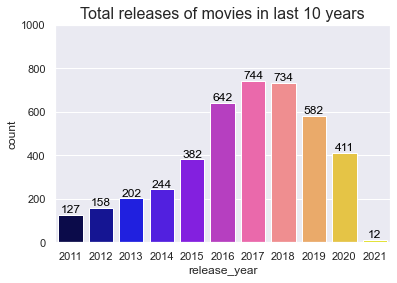

In [92]:
data1 = movies[movies.release_year >= 2011]

sns.countplot(x='release_year', data=data1, palette="gnuplot2")
ax =plt.pyplot.gca()

y_max=data1['type'].value_counts().max()
ax.set_ylim([0,1000])

for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2., p.get_height(), '%d'% int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
    
pplt.title('Total releases of movies in last 10 years', size='16')

pplt.show()

The number of movies have increased every next year. It reached to top in 2017. But after year 2017, the number of movies is decreasing.

### 5. Country wise contribution in movies

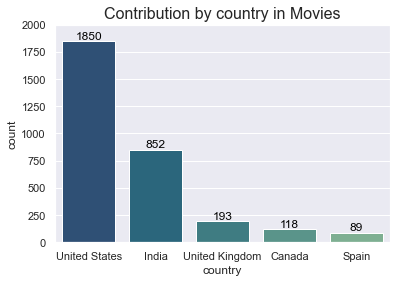

In [112]:
top = movies.groupby(['country'])['show_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)

sns.barplot(x='country', y='count', data=top.head(), palette="crest_r")
g=plt.pyplot.gca()

y_max=top['country'].value_counts().max()
g.set_ylim([0,2000])

for p in g.patches:
    g.text(p.get_x()+p.get_width()/2., p.get_height(), '%d'% int(p.get_height()),
          fontsize=12, color='black', ha='center', va='bottom')

pplt.title('Contribution by country in Movies', size='16')

pplt.show()

USA has highest contribution for movies followed by India and United Kingdom.

### 6. Country wise contribution in TV Shows

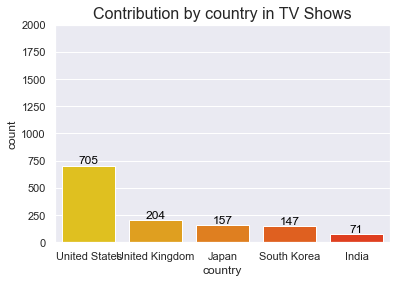

In [116]:
top = shows.groupby(['country'])['show_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)

sns.barplot(x='country', y='count', data=top.head(), palette="autumn_r")
g=plt.pyplot.gca()

y_max=top['country'].value_counts().max()
g.set_ylim([0,2000])

for p in g.patches:
    g.text(p.get_x()+p.get_width()/2., p.get_height(), '%d'% int(p.get_height()),
          fontsize=12, color='black', ha='center', va='bottom')

pplt.title('Contribution by country in TV Shows', size='16')

pplt.show()

USA has highest contrinution for TV Shows followed by UK and Japan.

### 7. Last few years trends in Netflix in USA

In [13]:
usa = data[data.country == 'United States']
usa.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",2019,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...


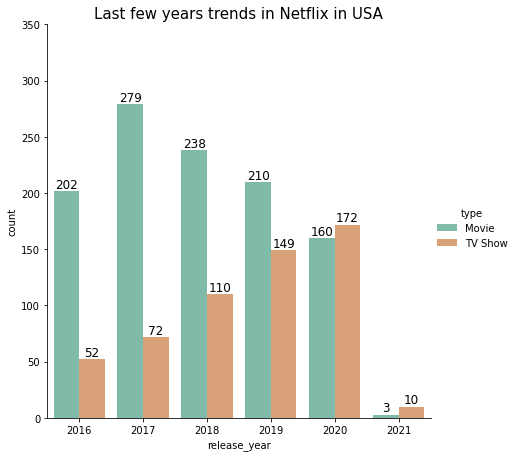

In [38]:
usa_recent = usa[usa.release_year >= 2016]
a=sns.catplot(
        data=usa_recent, kind="count", x="release_year", hue="type", ci="sd", palette="Dark2", alpha=.6, height=6)

ax =plt.pyplot.gca()

y_max = usa_recent['type'].value_counts().max() 
ax.set_ylim([0, 350])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
pplt.title('Last few years trends in Netflix in USA',size='15')
pplt.show()

In USA, earlier the number of movies was greater than the number of TV Shows; but after 2020, the number of TV shows have overtaken the number of movies.

### 8. Last few years trends in Netflix in Japan

In [59]:
jp = data[data.country == 'Japan']
jp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
24,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,NaN,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan,"January 23, 2020",2020,TV-14,2 Seasons,"Anime Series, International TV Shows",Seiya and the Knights of the Zodiac rise again...
107,s108,Movie,37 Seconds,Hikari,"Mei Kayama, Misuzu Kanno, Shunsuke Daitoh, Mak...",Japan,"January 31, 2020",2020,TV-MA,116 min,"Dramas, International Movies","Trapped by society and familial obligations, a..."
228,s229,Movie,A Silent Voice,Naoko Yamada,"Miyu Irino, Saori Hayami, Aoi Yuki, Kensho Ono...",Japan,"June 5, 2019",2016,TV-14,130 min,"Anime Features, International Movies",A former class bully reaches out to the deaf g...
253,s254,Movie,A Whisker Away,"Junichi Sato, Tomotaka Shibayama","Mirai Shida, Natsuki Hanae, Hiroaki Ogi, Koich...",Japan,"June 18, 2020",2020,TV-PG,104 min,"Anime Features, Children & Family Movies, Inte...",A peculiar girl transforms into a cat to catch...
260,s261,TV Show,A.I.C.O.,Kazuya Murata,"Haruka Shiraishi, Yusuke Kobayashi, Makoto Fur...",Japan,"March 9, 2018",2018,TV-14,1 Season,"Anime Series, International TV Shows",Everything Aiko knew was a lie. Now she's join...


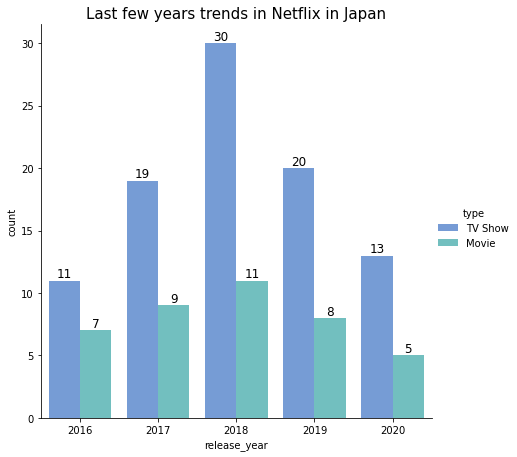

In [82]:
jp_recent = jp[jp.release_year >= 2016]
b=sns.catplot(
        data=jp_recent, kind="count", x="release_year", hue="type", ci="sd", palette="winter", alpha=.6, height=6)

bx =plt.pyplot.gca()

y_max = jp_recent['type'].value_counts().max() 
ax.set_ylim([0, 350])

for p in bx.patches:
    bx.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
pplt.title('Last few years trends in Netflix in Japan',size='15')
pplt.show()

In Japan, every year, the number of TV Shows is greater than the number of movies.

### 9. Analysis of Movie Ratings

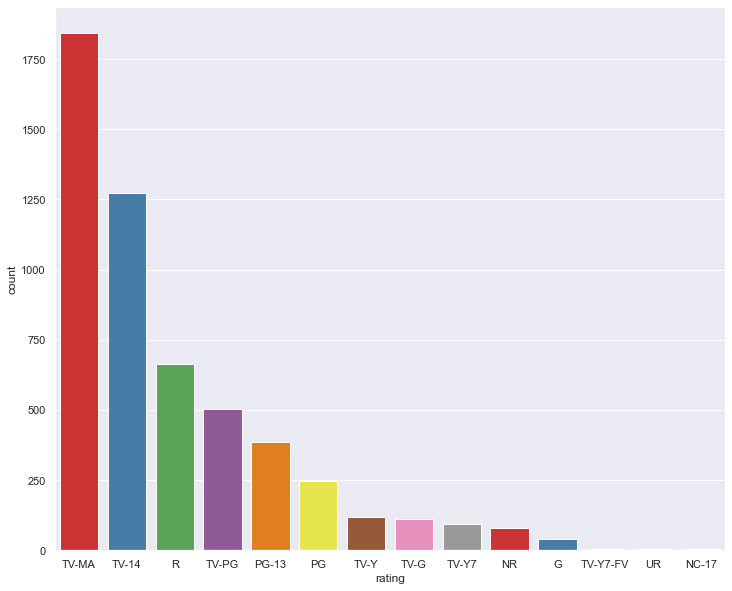

In [93]:
pplt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=movies, palette="Set1", order=movies['rating'].value_counts().index[0:15])

### 10. Duration of movies

In [96]:
movies['duration']=movies['duration'].str.replace(' min','')
movies['duration']=movies['duration'].astype(str).astype(int)
movies['duration']

<ipython-input-96-1c21db96df55>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-96-1c21db96df55>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int32

<AxesSubplot:xlabel='duration', ylabel='Density'>

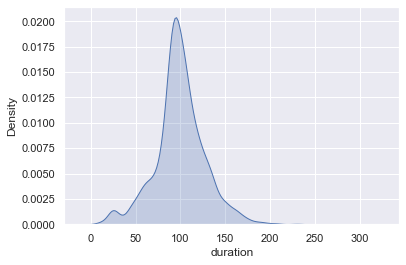

In [97]:
sns.set(style="darkgrid")
sns.kdeplot(data=movies['duration'], shade=True)

The common duration is between 75 to 125 minutes

<ipython-input-114-50d06ec8b50e>:22: UserWarning:

FixedFormatter should only be used together with FixedLocator



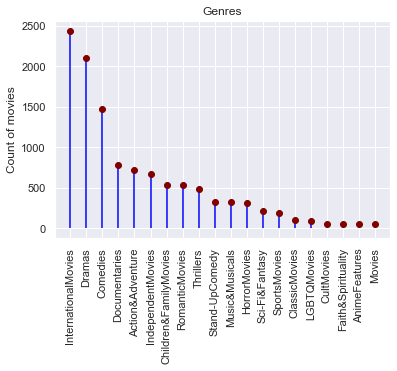

<Figure size 720x720 with 0 Axes>

In [114]:
from collections import Counter

genres=list(movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = pplt.subplots()

fig = pplt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='blue')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");

 international movies, dramas and comedies are the top three genres